In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
#Remove duplicates from Study Results data
study_results_nodupl = study_results.groupby(['Mouse ID', 'Timepoint']).first()
mouse_metadata_nodupl = mouse_metadata.groupby(['Mouse ID']).first()

mouse_metadata_nodupl
study_results_nodupl

Tumor Volume (mm3)  Metastatic Sites
Mouse ID Timepoint                                      
a203     0                   45.000000                 0
         5                   48.508468                 0
         10                  51.852437                 1
         15                  52.777870                 1
         20                  55.173336                 1
...                                ...               ...
z969     25                  63.145652                 2
         30                  65.841013                 3
         35                  69.176246                 4
         40                  70.314904                 4
         45                  73.867845                 4

[1888 rows x 2 columns]

In [4]:
#Mouse DataFrame
mouse_info_df = pd.DataFrame(mouse_metadata_nodupl, columns=["Drug Regimen", "Sex", "Age_months", "Weight (g)"])
mouse_info_df

,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,
a203,Infubinol,Female,20,23
a251,Infubinol,Female,21,25
a262,Placebo,Female,17,29
a275,Ceftamin,Female,20,28
a366,Stelasyn,Female,16,29
...,...,...,...,...
z435,Propriva,Female,12,26
z578,Ramicane,Male,11,16
z581,Infubinol,Female,24,25


In [5]:
#Study DataFrame
study_info_df = pd.DataFrame(study_results_nodupl, columns=["Tumor Volume (mm3)", "Metastatic Sites"])
study_info_df

Tumor Volume (mm3)  Metastatic Sites
Mouse ID Timepoint                                      
a203     0                   45.000000                 0
         5                   48.508468                 0
         10                  51.852437                 1
         15                  52.777870                 1
         20                  55.173336                 1
...                                ...               ...
z969     25                  63.145652                 2
         30                  65.841013                 3
         35                  69.176246                 4
         40                  70.314904                 4
         45                  73.867845                 4

[1888 rows x 2 columns]

In [6]:
#Re-index
study_info_df.reset_index(inplace=True)

In [7]:
study_info_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,0,45.000000,0
1,a203,5,48.508468,0
2,a203,10,51.852437,1
3,a203,15,52.777870,1
4,a203,20,55.173336,1


In [8]:
# Merge two dataframes using an inner join
mouse_merge = pd.merge(mouse_info_df, study_info_df, on="Mouse ID", how="inner")

# Display the data table for preview
mouse_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
mouse_merge.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).reset_index()

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

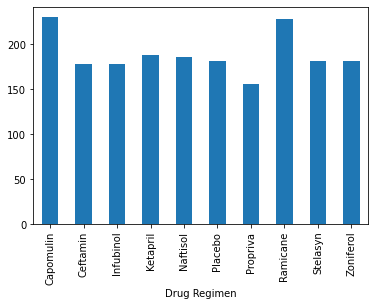

In [11]:
#Get Timepoint totals by Regimen
timepoint_totals = mouse_merge.groupby(['Drug Regimen']).count()['Timepoint']
timepoint_totals.plot(kind = 'bar')

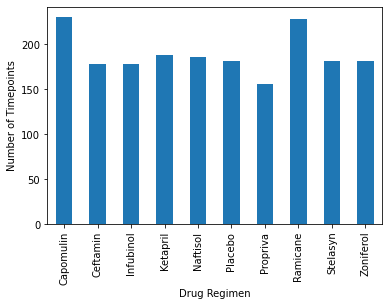

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
timepoint_totals.plot(kind='bar')
plt.ylabel("Number of Timepoints")
plt.show()